# Sklearn Workshop

14:26 - 15:59

# 1. ETL
- load the data

In [117]:
import pandas as pd
import numpy as np

In [118]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Note: Many fields need to be converted to numbers

# 2. EDA
- output: top three features

In [120]:
import seaborn as sns

# sns.pairplot(df)

In [121]:
#looks like age...influences, but other looks difficult....

### 2.1 Univariate analysis

In [122]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [124]:
#discrete column
dis_col = df.select_dtypes(include=['object']).columns
#continuous column
con_col = df.select_dtypes(include=['int64', 'float64']).columns

In [125]:
#comment for readability
# for col in dis_col:
#     sns.countplot(data = df, x=col)

# for col in con_col:
#     sns.displot(data = df, x = col)

### A big problem: our data has imbalanced data!

In [126]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [127]:
#many ways to fix imbalances, but we gonna take only 248 for class 0

#1. create the df with class = 1
stroke_1 = df.loc[df['stroke'] == 1]
stroke_1.shape

(248, 11)

In [128]:
#2. create the df with class = 0
stroke_0 = df.loc[df['stroke'] == 0].sample(n=248, random_state=999)
stroke_0.shape

(248, 11)

In [129]:
new_df = pd.concat([stroke_1, stroke_0])
new_df['stroke'].value_counts()

1    248
0    248
Name: stroke, dtype: int64

### 2.2 Multivariate analysis

In [130]:
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [131]:
# import matplotlib.pyplot as plt
# for col in dis_col:
#     sns.barplot(x = df['stroke'], y = df[col])
#     plt.show()
    
#note:  definitely not gender!

In [132]:
#smoking status

In [133]:
# con_col = con_col.drop('stroke')
# con_col

# for col in con_col:
#     sns.barplot(x = df['stroke'], y = df[col])
#     plt.show()
    
#age, hypertension, heart_diseases, avg_glucose_level

# 3. Feature selection/extraction
- set X, and y
- train test split

In [134]:
#before setting X and y
#i will transform data using label encoder and get_dummy first
#just for convenience, since it won't cause data leakage anyway

df.info()

#i need to consider age, hypertension, heart_disease, smoking status, avg_glucose_level
#ONLY smoking status is a problem

#format: pd.get_dummies(dataframe, columns, drop_first)
#drop_first means the advanced one-hot encoding i told you before

new_df = pd.get_dummies(new_df, columns=['smoking_status'], drop_first=True)

#please notice that one category of smoking status is gone
#because we use the advanced one-hot encoding by calling drop_first=True
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,1,1,0,0


In [135]:
new_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [136]:
#now set the X and y

X = new_df[  ['age', 
        'hypertension', 
        'heart_disease', 
        'avg_glucose_level', 
        'smoking_status_formerly smoked', 
        'smoking_status_never smoked',
       'smoking_status_smokes']   ]

y = new_df['stroke']

X.shape, y.shape

((496, 7), (496,))

In [137]:
#check imbalanced data
y.value_counts()

1    248
0    248
Name: stroke, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((347, 7), (149, 7), (347,), (149,))

# 4. Clean data
- clean missing values
- transfer categorical values to numbers
  - label encoder and one-hot encoder(get_dummy)
- standardize

In [140]:
# X_train.isna().sum()

118.98598265895951 96.175


<ipython-input-141-a296549313ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)
<ipython-input-141-a296549313ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)


0

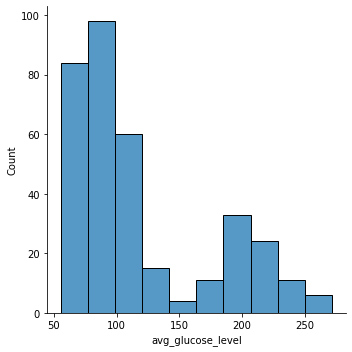

In [141]:
#1. check distribution
sns.displot(X_train['avg_glucose_level'])
print(X_train['avg_glucose_level'].mean(), X_train['avg_glucose_level'].median())

#distribution is skewed, and from the eye, median() is much better
#2. fill the training set, as well as the testing set
X_train['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)

#3. also fill the test set but with the training set, in case any empty
X_test['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)

X_train['avg_glucose_level'].isna().sum()

### Standardize

In [142]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# 5. Modeling
- cross validation -> grid search
- this problem is a classification problem
  - use RandomForestClassifer, SVC, LogisticRegression, GaussianNB

### 5.1 Cross validation

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
sv = SVC()
lr = LogisticRegression(max_iter=1000)
gn = GaussianNB()

models = [rf, sv, lr, gn]
scores = []

for model in models:
    scores.append(cross_val_score(model, X_train, y_train, cv=5,
                                  scoring='accuracy', ))
    
print(scores)

[array([0.71428571, 0.68571429, 0.68115942, 0.69565217, 0.75362319]), array([0.77142857, 0.65714286, 0.69565217, 0.76811594, 0.75362319]), array([0.8       , 0.7       , 0.73913043, 0.71014493, 0.79710145]), array([0.72857143, 0.71428571, 0.71014493, 0.76811594, 0.69565217])]


In [144]:
print(np.mean(scores, axis=1))

#rf, sv, lr, gn
#hmm....lr seems the best! 

[0.70608696 0.72919255 0.74927536 0.72335404]


### 5.2 Grid search

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

estimator = LogisticRegression(max_iter=1000)

grid = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv = 5,
                          refit=True,
                          scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [146]:
grid.best_params_

{'solver': 'newton-cg'}

# 6. Testing
- `.predict`
- use from sklearn.metrics import accuracy
- use from sklearn.metrics import classification_report
  - don't worry about what is recall, precision, f1
    - i will explain later....

In [147]:
from sklearn.metrics import accuracy_score, classification_report

yhat = grid.predict(X_test)

In [148]:
accuracy_score(y_test, yhat)

0.7919463087248322

In [149]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        78
           1       0.76      0.82      0.79        71

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149



# 7. Feature importance
- can you try

Logistic Regression does not support feature importances, but its weights are actually feature importances


In [150]:
grid.best_estimator_.coef_[0]

array([ 1.51894353,  0.21491552,  0.18181888,  0.2256257 ,  0.06897961,
       -0.16214134,  0.11743319])

<BarContainer object of 7 artists>

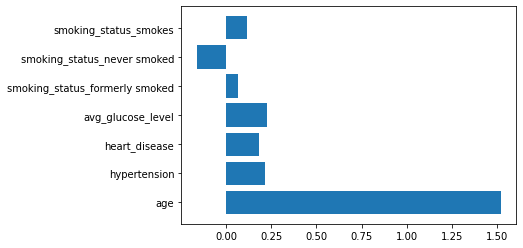

In [151]:
feature_names = ['age', 
                'hypertension', 
                'heart_disease', 
                'avg_glucose_level', 
                'smoking_status_formerly smoked', 
                'smoking_status_never smoked',
                'smoking_status_smokes']

plt.barh(feature_names, grid.best_estimator_.coef_[0])

In [152]:
#you can also try permutation and shap way here.
#i am not gonna do it....

# 8. Save models

In [153]:
#import pickle
import pickle

#set the filename
filename = 'brain_stroke.pkl' #.pkl is optional but useful for reminder

#dump the file 
#format: pickle.dump(model, open(filename, 'wb')) #wb stands writing
pickle.dump(grid, open(filename, 'wb'))

#i can show you how to load the model
loaded_model = pickle.load(open(filename, 'rb'))